In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\titanic.csv" , usecols = ['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
df['Age'].fillna(df['Age'].mean() , inplace = True)

In [6]:
X = df.iloc[: , 1:3]
y = df.iloc[: , 0]

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=3 , test_size = 0.2)

In [8]:
# Without Applying Binning
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score is :: ',accuracy_score(y_test , y_pred))
print('Cross Validation is :: ' , np.mean(cross_val_score(clf,X,y.values.ravel(),scoring ='accuracy' , cv=10 )))

Accuracy Score is ::  0.6312849162011173
Cross Validation is ::  0.6565917602996254


In [9]:
kbin_age = KBinsDiscretizer(n_bins = 10 , encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins = 10 , encode='ordinal',strategy='quantile')

In [10]:
trf = ColumnTransformer(transformers = [
    ('first' , kbin_age , [0]),
    ('second', kbin_fare , [1] )
])

In [11]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [12]:
trf.named_transformers_['first'].n_bins_

array([9])

In [13]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 16.        , 21.        , 25.        , 29.        ,
              29.69911765, 33.        , 39.        , 48.        , 74.        ])],
      dtype=object)

In [14]:
# X_train['Age'] is not a list but rather a Pandas Series. However, you can still use it to create a DataFrame.

output = pd.DataFrame(
{'age' : X_train['Age'],
 'age_trf':X_train_trf[: , 0],
 'fare' : X_train['Fare'],
 'fare_trf':X_train_trf[:,1]
}
)

In [15]:
output['age_labels'] = pd.cut(x = X_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [16]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
146,27.000000,3.0,7.7958,1.0,"(25.0, 29.0]","(7.496, 7.854]"
195,58.000000,8.0,146.5208,9.0,"(48.0, 74.0]","(77.958, 512.329]"
786,18.000000,1.0,7.4958,1.0,"(16.0, 21.0]","(0.0, 7.496]"
290,26.000000,3.0,78.8500,9.0,"(25.0, 29.0]","(77.958, 512.329]"
521,22.000000,2.0,7.8958,2.0,"(21.0, 25.0]","(7.854, 8.05]"
...,...,...,...,...,...,...
256,29.699118,5.0,79.2000,9.0,"(29.0, 29.699]","(77.958, 512.329]"
643,29.699118,5.0,56.4958,8.0,"(29.0, 29.699]","(41.288, 77.958]"
249,54.000000,8.0,26.0000,6.0,"(48.0, 74.0]","(21.645, 26.865]"
664,20.000000,1.0,7.9250,2.0,"(16.0, 21.0]","(7.854, 8.05]"


In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf , y_train)
y_pred = clf.predict(X_test_trf)
accuracy_score(y_test , y_pred)

0.6480446927374302

In [18]:
def discretizer(n_bins , strategy):
    
    clf = DecisionTreeClassifier()
    print(np.mean(cross_val_score(clf , X , y , cv=10 , scoring = 'accuracy')))
    trf = ColumnTransformer([
        
        ('first' , KBinsDiscretizer(n_bins = n_bins , strategy = strategy , encode = 'ordinal') , ['Age']),
        ('second' , KBinsDiscretizer(n_bins = n_bins , strategy = strategy , encode = 'ordinal') , ['Fare']),
    ])
    
    X_train_trf = trf.fit_transform(X_train)
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.title('Before')
    plt.hist(X_train['Age'])
    plt.subplot(122)
    plt.title('After')
    plt.hist(X_train_trf[: , 0] , color = 'r')
    plt.show()
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.title('Before')
    plt.hist(X_train['Fare'])
    plt.subplot(122)
    plt.title('After')
    plt.hist(X_train_trf[: , 1] , color = 'r')
    plt.show()

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6622097378277153


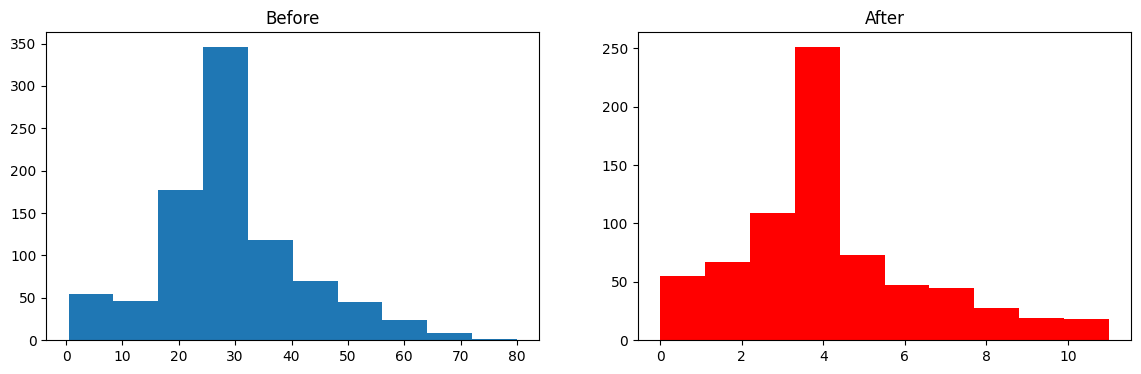

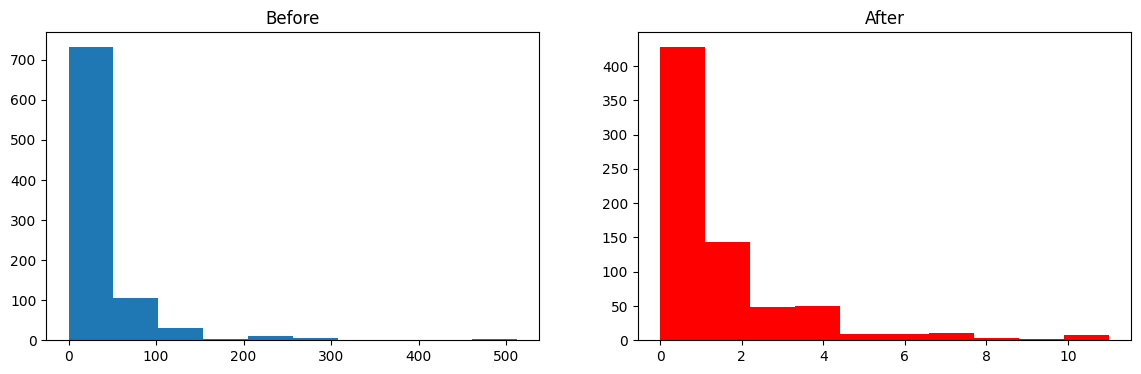

In [19]:
discretize(12 , 'kmeans')

# BINARIZATION

In [20]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\titanic.csv")[['Age' , 'Fare' , 'SibSp' , 'Parch' , 'Survived']]
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [21]:
df.dropna(inplace =  True)

In [22]:
df['Family'] = df['SibSp'] + df['Parch']

In [23]:
df.drop(df[['SibSp' , 'Parch']], axis = 1, inplace = True)

In [24]:
df.head()

,Age,Fare,Survived,Family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [25]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(['Survived'] , axis = 1),df['Survived'] , random_state=3 , test_size = 0.2)

In [26]:
trf = ColumnTransformer(transformers = [
    
    ('bin' , Binarizer(copy = False) , ['Family'])
] , remainder = 'passthrough')

# Here Binarizer(copy = False) default threshold=0.0 , greater then 0 is 1 if not then 0.
# copy = True , after changing the transformation it will ctrete a new column
# copy = False, this will modify the existing column

In [27]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [28]:
pd.DataFrame(X_train_trf, columns = X_train.columns)

,Age,Fare,Family
0,0.0,18.00,9.8417
1,0.0,34.00,13.0000
2,1.0,52.00,78.2667
3,0.0,21.00,7.2500
4,1.0,1.00,39.6875
...,...,...,...
566,1.0,27.00,12.4750
567,1.0,40.00,134.5000
568,0.0,39.00,0.0000
569,1.0,26.00,26.0000


In [29]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf , y_train)
y_pred = clf.predict(X_test_trf)
accuracy_score(y_test , y_pred)

0.6083916083916084